In [1]:
#!pip install pycaret
#!pip install -U pip setuptools wheel
#!pip install -U spacy
#!python -m spacy download en_core_web_sm

In [7]:
#!pip install -U pycaret --user

#  Load Dataset

In [8]:
from pycaret.datasets import get_data
data = get_data('kiva')

,country,en,gender,loan_amount,nonpayment,sector,status
0,Dominican Republic,"""Banco Esperanza"" is a group of 10 women looki...",F,1225,partner,Retail,0
1,Dominican Republic,"""Caminemos Hacia Adelante"" or ""Walking Forward...",F,1975,lender,Clothing,0
2,Dominican Republic,"""Creciendo Por La Union"" is a group of 10 peop...",F,2175,partner,Clothing,0
3,Dominican Republic,"""Cristo Vive"" (""Christ lives"" is a group of 10...",F,1425,partner,Clothing,0
4,Dominican Republic,"""Cristo Vive"" is a large group of 35 people, 2...",F,4025,partner,Food,0


In [9]:
#check the shape of data
data.shape

(6818, 7)

In [10]:
# sampling the data to select only 1000 documents
data = data.sample(1000, random_state=786).reset_index(drop=True)
data.shape

(1000, 7)

# Initialization of the environment

In [11]:
from pycaret.nlp import *
exp_nlp101 = setup(data = data, target = 'en', session_id = 123)

Description,Value
session_id,123
Documents,1000
Vocab Size,5302
Custom Stopwords,False


# Creation of the Model

In [9]:
models()

,Name,Reference
ID,,
lda,Latent Dirichlet Allocation,gensim/models/ldamodel
lsi,Latent Semantic Indexing,gensim/models/lsimodel
hdp,Hierarchical Dirichlet Process,gensim/models/hdpmodel
rp,Random Projections,gensim/models/rpmodel
nmf,Non-Negative Matrix Factorization,sklearn.decomposition.NMF


In [10]:
lda = create_model('lda')

In [11]:
print(lda)

LdaModel(num_terms=5302, num_topics=4, decay=0.5, chunksize=100)


We have created the Latent Dirichlet Assignment (LDA) model with a single word, that is, `create_model ()`. Notice that the `num_topics` parameter is set to` 4`, which is a default value taken when you do not pass the `num_topics` parameter in` create_model () `. In the following example, we will create an LDA model with 6 themes and also set the `multi_core` parameter to` True`. When `multi_core` is set to` True`, Latent Dirichlet Allocation (LDA) uses all CPU cores to parallelize and speed up model training.

In [12]:
lda2 = create_model('lda', num_topics = 6, multi_core = True)

In [13]:
print(lda2)

LdaModel(num_terms=5302, num_topics=6, decay=0.5, chunksize=100)


#  Model assignation

Now that we have created a theme model, we would like to assign the theme proportions to our dataset (6818 documents / samples) to analyze the results. We will achieve this using the ʻassign_model () `function. See an example below:

In [14]:
lda_results = assign_model(lda)
lda_results.head()

,country,en,gender,loan_amount,nonpayment,sector,status,Topic_0,Topic_1,Topic_2,Topic_3,Dominant_Topic,Perc_Dominant_Topic
0,Kenya,praxide marry child primary school train tailo...,F,75,partner,Services,0,0.871802,0.000354,0.001464,0.126379,Topic 0,0.87
1,Kenya,gynaecology practitioner run reproductive year...,M,1200,partner,Health,0,0.984097,0.000325,0.001341,0.014237,Topic 0,0.98
2,Dominican Republic,live san_cristobal child boy girl range year o...,F,150,partner,Clothing,0,0.070113,0.000361,0.001493,0.928032,Topic 3,0.93
3,Kenya,phanice marry child daughter secondary school ...,F,150,lender,Services,1,0.727180,0.000391,0.001616,0.270813,Topic 0,0.73
4,Kenya,fredrice nzioka kilonzo year old hotel operate...,F,300,lender,Food,1,0.463812,0.000355,0.208921,0.326911,Topic 0,0.46


Notice how 6 additional columns are now added to the data frame. ʻEn` is the text after all the preprocessing. `Topic_0 ... Topic_3` are the proportions of the topics and represent the distribution of topics for each document. `Dominant_Topic` is the topic number with the highest proportion and` Perc_Dominant_Topic` is the percentage of dominant topic over 1 (only shown when the models are stochastic, that is, the sum of all the proportions is equal to 1).

#  Visualization of the Model

The `plot_model ()` function can be used to parse the general corpus or just specific topics extracted through the topic model. So the `plot_model ()` function can also work without passing any trained model objects. See examples below:

###  Frequency Distribution of Entire Corpus

In [16]:
plot_model()

###  Top 100 Bigrams on Entire Corpus

In [12]:
plot_model(plot = 'bigram')

###  Frequency Distribution of Topic 1

`plot_model ()` can also be used to parse the same plots for specific topics. To generate topic-level plots, the function requires the trained model object to be passed inside `plot_model ()`. In the following example, we will generate a frequency distribution on `Topic 1` only as defined in the` topic_num` parameter.

In [17]:
plot_model(lda, plot = 'frequency', topic_num = 'Topic 1')

###  Topic Distribution

In [18]:
plot_model(lda, plot = 'topic_distribution')

Each document is a distribution of topics and not a single topic. Although, if the task is to categorize the document into specific topics, it would not be wrong to use the ratio of topics with the highest value to categorize the document into ** one topic **. In the chart above, each document is ranked on a topic using the highest proportion of topic weights. We can see that most of the documents are in "Topic 3" and only a few are in "Topic 1". If you hover your mouse over these bars, you will get a basic idea of ​​the topics in this topic by looking at the keywords.

For example, if you evaluate "Topic 2", you will see keywords like "farmer", "rice", "land", which probably means that loan applicants in this category belong to agricultural loans. However, if you hover over `Topic 0` and` Topic 3`, you will notice that many repetitions and keywords overlap in all topics, such as the word "loan" and "business" that appear in both the ` Topic 0` as in `Topic 3`

###  T-distributed Stochastic Neighbor Embedding (t-SNE)

In [19]:
plot_model(lda, plot = 'tsne')

T-distributed stochastic neighbor embedding (t-SNE) is a nonlinear dimensionality reduction technique well suited for embedding high-dimensional data for display in two- or three-dimensional low-dimensional space.

### Uniform Manifold Approximation and Projection Plot

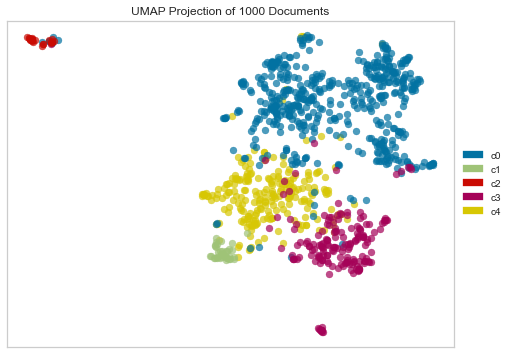

In [20]:
plot_model(lda, plot = 'umap')

UMAP (Uniform Manifold Approximation and Projection) is a novel multi-learning technique for dimensionality reduction. It is similar to tSNE and PCA in purpose, as they are all dimensionality reduction techniques for 2d / 3d projections. UMAP is built from a theoretical framework based on Riemannian geometry and algebraic topology.

#  Evaluation of the Model

Another way to analyze model performance is to use the ʻevaluate_model () `function which displays a user interface for all available graphics for a given model. It uses the `plot_model ()` function internally. See the example below where we have generated a sentiment polarity plot for `Topic 3` using the LDA model stored in the variable` lda`.

In [21]:
evaluate_model(lda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Frequency Plot', 'freque…

#  Save  model

As you delve deeper into natural language processing, you will learn that topic model training time increases exponentially as the size of the corpus increases. As such, if you want to continue your experiment or analysis at a later time, you do not need to repeat the entire experiment and retrain your model. PyCaret's built-in `save_model ()` function allows you to save the model for later use.

In [22]:
save_model(lda,'Final LDA Model')

Model Succesfully Saved


#  Load model

To load a model saved at a future date in the same environment or in a different one, we would use PyCaret's `load_model ()` function.

In [23]:
saved_lda = load_model('Final LDA Model')

Model Sucessfully Loaded


In [24]:
print(saved_lda)

LdaModel(num_terms=5302, num_topics=4, decay=0.5, chunksize=100)
